# <center>Hypothesis Testing Errors</center>


### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

### Has the network latency gone up since we switched internet service providers?
* ___Null Hypothesis:___
    * ___$H_{0}$___: The average network latency is less than or equal since we switched internet service providers.
    
    
* ___Alternative Hypothesis:___
    * ___$H_{a}$___: The average network latency is higher since we switched internet service providers.
    

* ___True Positive:___ 
    * The average network latency has gone up since switching internet service providers.


* ___True Negative:___
    * The average network latency is less than or equal since we switched internet service providers.


* ___Type I Error:___
    * We rejected the $H_{0}$ when we should have accepted the proposition and the network latency has actually gone down or stayed the same.


* ___Type II Error:___
    * We accepted the $H_{0}$ when we should have rejected the null hypothesis, meaning the network latency has actually gone up.
       

### Is the website redesign any good?

* ___Null Hypothesis:___
    * ___$H_{0}$___: The website redesign is same or worse than before.
    

* ___Alternative Hypothesis:___
    * ___$H_{a}$___: The website redesign is better than before.
    

* ___True Positive:___ 
    * The website redesign is better than before.


* ___True Negative:___
    * The website redesign is the same or worse than before.
    

* ___Type I Error:___
    * We rejected the $H_{0}$ when we should have accepted the proposition and the website has actually got worse or stayed the same.
    

* ___Type II Error:___
    * TWe accepted the $H_{0}$ when we should have rejected the null hypothesis, meaning the website has actually got.
    
    

### Is our television ad driving more sales?
* ___Null Hypothesis:___
    * ___$H_{0}$___: The television ads are not driving or lowering more sales.


* ___Alternative Hypothesis:___
    * ___$H_{a}$___: The television ads are driving more sales.


* ___True Positive:___ 
    * The television ads are infact driving more sales.


* ___True Negative:___
    * The television ads are either lowering or keeping sales the same.
    

* ___Type I Error:___
    * We rejected the $H_{0}$ when we should have accepted the proposition and the television ads have lowered or maintained sales.
    

* ___Type II Error:___
    * We accepted the $H_{0}$ when we should have rejected the null hypothesis, meaning the television ads have actually increased sales.

# <center>T-Test Mean Comparison</center>

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

* ${H}_0$: There is no difference between the average time it takes to sell homes between the two offices.


* ${H}_{a}$: There is a difference between the average time it takes to sell homes between the two offices.


#### Results:

* We would reject the ${H}_0$ hypothesis and state that there is a difference between the average time it takes to sell homes between the two offices.

In [116]:
from math import sqrt
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pydataset import data


u1 = 90 # Number of mean in days
s1 = 15 # Standard deviation in days
n1 = 40 # Sample size of sales

u2 = 100 # Number of mean in days
s2 = 20 # Standard deviation in days
n2 = 50 # Sample size of sales

alpha = .05

t, p = (stats.ttest_ind_from_stats(u1, s1, n1, u2, s2, n2, equal_var=False))
print(*(t, p))

-2.7091418459143854 0.00811206270346016


Load the `mpg` dataset and use it to answer the following questions:

### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
<center><h1>1999</h1></center> | <center><h1>2008</h1></center>
- | - 
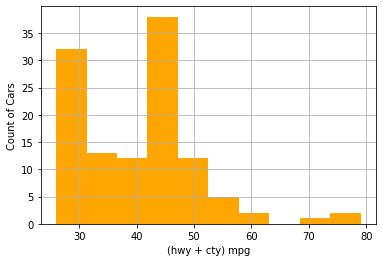|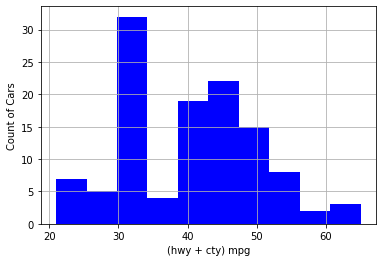

#### ${H}_0$:  
* There is no difference in fuel-efficiency in cars from 2008 vs 1999.

#### ${H}_{a}$: 
* There ___IS___ a difference in fuel-efficiency in cars from 2008 vs 1999.


#### Verify Assumptions:

1. Independent Samples, this is from 1-sample using the same data, so both observations exist in both sets.

2. Normal Distribution, or at least 30 observations. Due to there being enough observations ($observations \ge 30$) we can use this data.

3. The variances are not equal and we will compensate for this using the argument:
```python
equal_var = False
```


#### Results:

Result|1999 | 2008
-| - | - 
Variance|108.490|96.390
---|---|---
t|---|0.21960177245940962
p|---|0.8263750772060638


#### Analysis:

* Since our p-value is greater than our alpha (`.05`) we accept the ${H}_0$. Meaning the data is not-significant.  

In [156]:
mpg = data('mpg')
alpha = .05
mpg['avg_fe'] = (mpg.hwy + mpg.cty)/2


fuel_efficiency08 = mpg[mpg.year == 2008].avg_fe
fuel_efficiency99 = mpg[mpg.year == 1999].avg_fe

variance = fuel_efficiency99.var(), fuel_efficiency08.var()
t, p  = stats.ttest_ind(fuel_efficiency99, fuel_efficiency08, equal_var=False)
print(t, p)


0.21960177245940962 0.8263750772060638


### Are compact cars more fuel-efficent than the average car?
<center><h1>Compact</h1></center> | <center><h1>Not Compact</h1></center>
- | - 
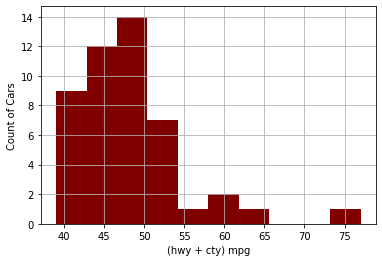|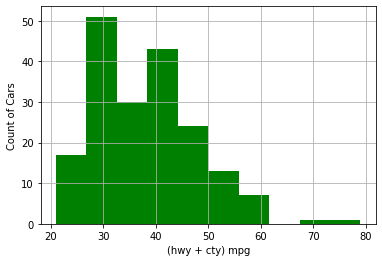

#### ${H}_0$: 
* Compact cars have a fuel efficiency less than or equal to that of the average car (non compact).

#### ${H}_{a}$:
* Compact cars have a fuel efficiency greater than of the average car (non compact).


#### Verify Assumptions:

1. Independent Samples, this is from 1-sample using the same data, so both observations exist in both sets.

2. Normal Distribution, or at least 30 observations. Due to there being enough observations ($observations \ge 30$) we can use this data.

3. The variances are not equal and we will compensate for this using the argument:
```python
equal_var = False
```


#### Results:

Result|Compact|Non Compact
-| - | - 
Variance|49.772|94.611
---|---|---
t|---|7.896888573132535
p|---|2.0992818971585668e-10


#### Analysis:

* Since our p-value is less than our alpha of ($.05$) we would reject the ${H}_0$ and accept our ${H}_{a}$, indicating compact cars are __more__ fuel efficient. 

In [162]:

compact = mpg[mpg['class'] == 'compact'].avg_fe
all_cars_mean = mpg.avg_fe.mean()

t, p  = stats.ttest_1samp(compact, all_cars_mean)
print(t, p/2)

7.896888573132535 2.0992818971585668e-10


### Do manual cars get better gas mileage than automatic cars?
<center><h1>Manual</h1></center> | <center><h1>Automatic</h1></center>
- | - 
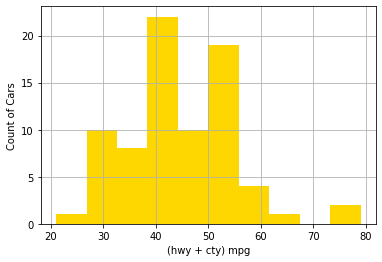|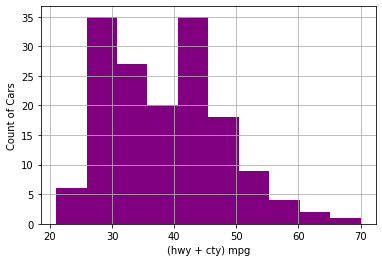

#### ${H}_0$: 
* 

#### ${H}_{a}$:
* 

#### Verify Assumptions:

1. Independent Samples, this is from 1-sample using the same data, so both observations exist in both sets.

2. Normal Distribution, or at least 30 observations. Due to there being enough observations ($observations \ge 30$) we can use this data.

3. The variances are not equal and we will compensate for this using the argument:
```python
equal_var = False
```


#### Results:

Result|Manual|Automatic
-| - | - 
Variance|26.635|21.943
---|---|---
t|---|4.443514012903071
p|---|1.795224899991793e-05


#### Analysis:

* Since our p-value is greater than our alpha (`.05`) we accept the ${H}_{a}$. This means that the manual cars have a better gas mileage than automatic cars.

In [182]:

manual = mpg[mpg.trans.str.contains('manual')].avg_fe
automatic = mpg[mpg.trans.str.contains('auto')].avg_fe 

variance = round(manual.var(), 3), round(automatic.var(), 3)
t, p  = stats.ttest_ind(manual, automatic, equal_var=False)
